In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1. Generate 20 real number for the variable X from the uniform distribution U[0,1]**<br>
**2. Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 20 ,y 20 )} using the relation Yi = sin(2 π x i ) + ϵ i where ϵ i ~ N(0,0.25)**<br>

In [2]:
np.random.seed(0)

x_train = np.random.uniform(0.0, 1.0, 20)
x_train

ep=np.random.normal(loc=0.0, scale =0.25, size =20) # eplsilon

y_train =[np.sin(2*np.pi*x_train[i])+ ep[i] for i in range(20)]
y_train = np.array(y_train)
y_train

train_set = []
for x,y in zip(list(x_train),list(y_train)):
  p = []
  p.append(x)
  p.append(y)
  train_set.append(p)

train_set

[[0.5488135039273248, 0.07160139752371053],
 [0.7151893663724195, -1.02746518909153],
 [0.6027633760716439, -0.5234758278756018],
 [0.5448831829968969, -0.49181012665470686],
 [0.4236547993389047, -0.1767423436826111],
 [0.6458941130666561, -0.6301811136755062],
 [0.4375872112626925, 0.5982861714434515],
 [0.8917730007820798, -0.8143422813412529],
 [0.9636627605010293, 0.34110343778819774],
 [0.3834415188257777, 0.3050338808380371],
 [0.7917250380826646, -0.9543912079367367],
 [0.5288949197529045, -0.2273523781367287],
 [0.5680445610939323, -0.03143557773446137],
 [0.925596638292661, -0.08330742961651055],
 [0.07103605819788694, 0.4703972788060174],
 [0.08712929970154071, 0.6150518278334443],
 [0.02021839744032572, -0.09525191064068772],
 [0.832619845547938, -1.3634572990440175],
 [0.7781567509498505, -1.0713695149837028],
 [0.8700121482468192, -0.6898291317563067]]


**3. In the similar way construct a testing set of size 50
I,e. Test = { (x’ 1 ,y’ 1 ),(x’ 2 ,y’ 2 ),……,(x’ 50 ,y’ 50 )}**

In [3]:
x_test = np.random.uniform(0.0, 1.0, 50)
x_test

ep=np.random.normal(loc=0.0, scale =0.25, size =50) # eplsilon

y_test =[np.sin(2*np.pi*x_test[i])+ ep[i] for i in range(50)]
y_test = np.array(y_test)
y_test

test_set = []
for x,y in zip(list(x_test),list(y_test)):
  p = []
  p.append(x)
  p.append(y)
  test_set.append(p)

test_set

[[0.6667667154456677, -1.0840388324549484],
 [0.6706378696181594, -1.0229428509824454],
 [0.2103825610738409, 0.8912900057989811],
 [0.1289262976548533, 0.7383752694485293],
 [0.31542835092418386, 0.6253949557183387],
 [0.3637107709426226, 0.9806499563655567],
 [0.5701967704178796, -0.310482034336093],
 [0.43860151346232035, -0.007780785911367938],
 [0.9883738380592262, 0.2990786689268822],
 [0.10204481074802807, 1.0721029379415012],
 [0.2088767560948347, 1.261498805292504],
 [0.16130951788499626, 0.8037268394777077],
 [0.6531083254653984, -1.0880296886387468],
 [0.2532916025397821, 1.2633990719909278],
 [0.4663107728563063, 0.10930421402431595],
 [0.24442559200160274, 1.3049979536396241],
 [0.15896958364551972, 0.8929098969171094],
 [0.11037514116430513, 0.8833981389509342],
 [0.6563295894652734, -0.7426557360159569],
 [0.1381829513486138, 0.9398291011274951],
 [0.1965823616800535, 0.9468270410063907],
 [0.3687251706609641, 1.1808960218731286],
 [0.8209932298479351, -0.870424288705128

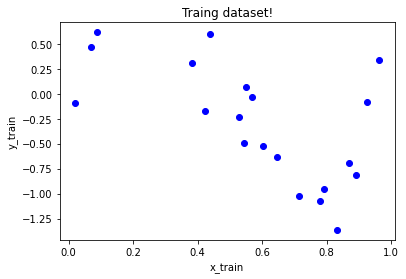

In [4]:
# Plotting training dataset

plt.scatter(x_train, y_train, color= "blue")
# x-axis label
plt.xlabel('x_train')
# frequency label
plt.ylabel('y_train')
# plot title
plt.title('Traing dataset!')
 
# function to show the plot
plt.show()


**4. Estimate the Least Square polynomial regression model of order M= 1,2, 3,9, using the training set T.**

**For example for M=1 ,we need to estimate**

`F(x) = β1 x + β0`

**For M = 2**

`F(x) = β2 x^2 + β1 x + β0` . 



In [5]:
def lossFun(y, y_hat):
  
    #Calculating loss.
    rmse = (1/float(len(y))) * (np.sqrt(np.mean((y_hat - y)**2)))
    return rmse

def find_theta(X, y, degrees):
    
    m = X.shape[0] # Number of training examples. 

    #x = x_transform(X, degrees)  
    t = X.copy()
    
    # Appending columns of higher degrees to X.
    for i in range(2,degrees+1):
        X = np.append(X, t**i, axis=1)

    X = np.append(X, np.ones((m,1)), axis=1)
    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    # The Normal Equation
    theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(X),X)), np.transpose(X)), y)
    
    return X, theta


In [6]:
X1, theta1 = find_theta(x_train.reshape(20,1), y_train.reshape(20,1), degrees =1)
X2, theta2 = find_theta(x_train.reshape(20,1), y_train.reshape(20,1), degrees =2)
X3, theta3 = find_theta(x_train.reshape(20,1), y_train.reshape(20,1), degrees =3)
X9, theta9 = find_theta(x_train.reshape(20,1), y_train.reshape(20,1), degrees =9)

In [7]:
X1

array([[0.5488135 , 1.        ],
       [0.71518937, 1.        ],
       [0.60276338, 1.        ],
       [0.54488318, 1.        ],
       [0.4236548 , 1.        ],
       [0.64589411, 1.        ],
       [0.43758721, 1.        ],
       [0.891773  , 1.        ],
       [0.96366276, 1.        ],
       [0.38344152, 1.        ],
       [0.79172504, 1.        ],
       [0.52889492, 1.        ],
       [0.56804456, 1.        ],
       [0.92559664, 1.        ],
       [0.07103606, 1.        ],
       [0.0871293 , 1.        ],
       [0.0202184 , 1.        ],
       [0.83261985, 1.        ],
       [0.77815675, 1.        ],
       [0.87001215, 1.        ]])

**5. List the value of coefficients of estimated polynomial regression models for each case.**

In [ ]:
print("Coefficients for M=1 \n",theta1)

print("Coefficients for M=2\n",theta2)

print("Coefficients for M=3\n",theta3)

print("Coefficients for M=9\n",theta9)

Coefficients for M=1 
 [[-1.23064761]
 [ 0.42674219]]
Coefficients for M=2
 [[-1.96522187]
 [ 0.74023344]
 [ 0.5472326 ]]
Coefficients for M=3
 [[ 13.3491831 ]
 [-38.81161085]
 [ 26.40630896]
 [ -0.32896223]]
Coefficients for M=9
 [[-1.62337970e+01]
 [ 6.78781489e+02]
 [-7.19566000e+03]
 [ 3.60113291e+04]
 [-1.00597821e+05]
 [ 1.66036948e+05]
 [-1.61181839e+05]
 [ 8.51772618e+04]
 [-1.89128670e+04]
 [ 1.07032056e-02]]


 **6. compute the RMSE for polynomial regression models for order M =1,2,3 and 9.**

In [ ]:
def predict(X, theta,degrees):
    
    #x = x_transform(X, degrees)  
    t = X.copy()
    
    # Appending columns of higher degrees to X.
    for i in range(2,degrees+1):
        X = np.append(X, t**i, axis=1)
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)

    loss = lossFun(X,preds)
    
    return preds, loss

In [ ]:
preds1,RMSE1 = predict(x_test.reshape(50,1), theta1, degrees =1)
preds2,RMSE2 = predict(x_test.reshape(50,1), theta2, degrees =2)
preds3,RMSE3 = predict(x_test.reshape(50,1), theta3, degrees =3)
preds9,RMSE9 = predict(x_test.reshape(50,1), theta9, degrees =9)

print("RMSE for M=1 \n",RMSE1)

print("RMSE for M=2\n",RMSE2)

print("RMSE for M=3\n",RMSE3)

print("RMSE for M=9\n",RMSE9)

RMSE for M=1 
 0.019654409686789026
RMSE for M=2
 0.018028998516363307
RMSE for M=3
 0.018769436665408392
RMSE for M=9
 0.014994712951187062


**7. Plot the estimate obtained by polynomial regression models for order M=1,2,3 and 9 for training set along with y 1, y 2, , y 50. . Also plot our actual mean estiamte E(Y/X) = sin(2 π x i ) .** 

In [ ]:
y_train_new =[np.sin(2*np.pi*x_train[i]) for i in range(20)]
y_train_new = np.array(y_train_new)

y_test_new =[np.sin(2*np.pi*x_test[i]) for i in range(50)]
y_test_new = np.array(y_test_new)

In [ ]:
def plot_graph(x,y,y_new, noOfsamples, theta, degrees):
  preds,RMSE = predict(x.reshape(noOfsamples,1), theta, degrees)

  fig = plt.figure(figsize=(8,6))

  #y with epsilon 
  plt.plot(x, y, 'b.')

  #y without epsilon 
  a,b = zip(*sorted(zip(x, y_new)))
  plt.plot(a, b, 'y')

  #prediction
  xs, ys = zip(*sorted(zip(x, preds)))

  plt.plot(xs,ys,'g')
  plt.legend(["Actual Data, y with eps", "y without eps","Polynomial predictions"])
  plt.xlabel('X - Input')
  plt.ylabel('y - target / true')
  plt.title('Prediction on Test dataset for M :'+str(degrees))
  plt.show()

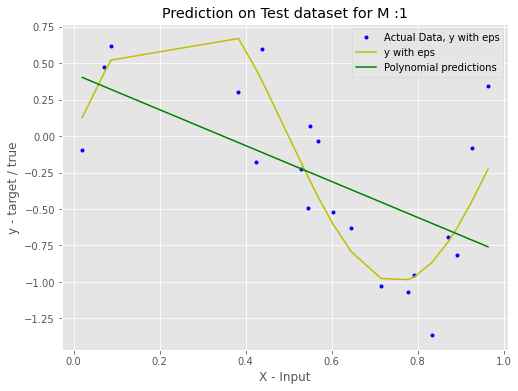

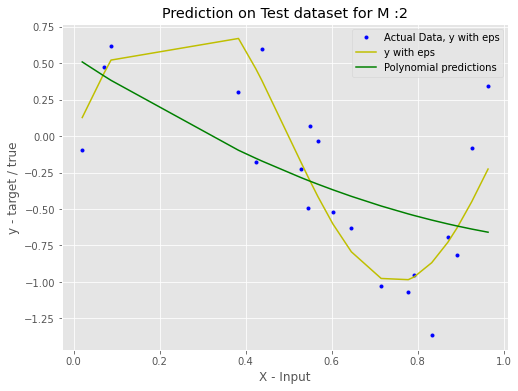

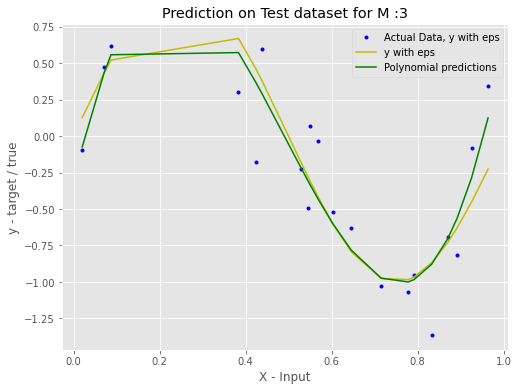

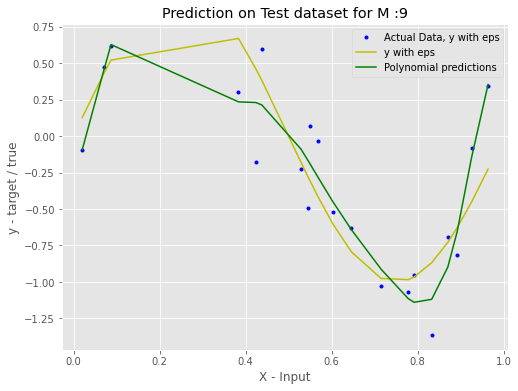

In [ ]:
plot_graph(x_train, y_train, y_train_new,20,theta1,1)
plot_graph(x_train, y_train, y_train_new,20,theta2,2)
plot_graph(x_train, y_train, y_train_new,20,theta3,3)
plot_graph(x_train, y_train, y_train_new,20,theta9,9)

**8. Plot the estimate obtained by polynomial regression models for order M=1,2,3 and 9 for testing set along with y’ 1, y’ 2, , y’ 50. . Also plot the sin(2πx’ i ) .**

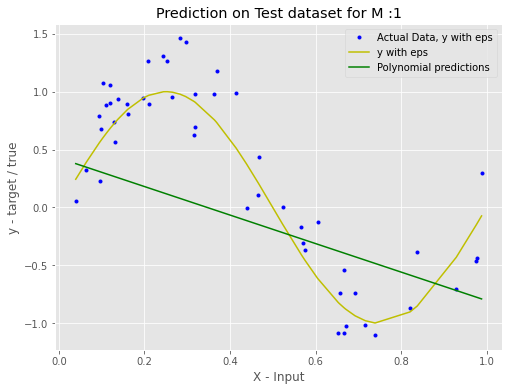

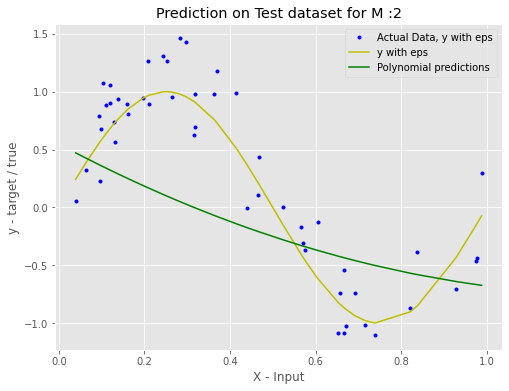

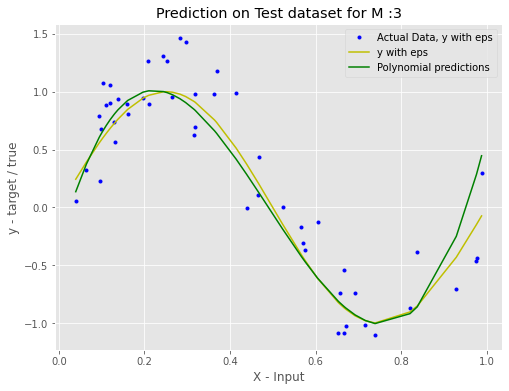

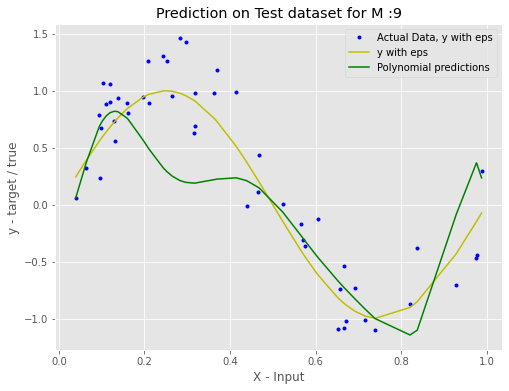

In [ ]:
plot_graph(x_test, y_test, y_test_new,50,theta1,1)
plot_graph(x_test, y_test, y_test_new,50,theta2,2)
plot_graph(x_test, y_test, y_test_new,50,theta3,3)
plot_graph(x_test, y_test, y_test_new,50,theta9,9)

**9. What happens when we increase the value of M. Note down your
observations.**<br>


ANS: As polynomial size M increases, we are getting better prediction for data which fit the data almost near to the line that we got by without using episilon in y. That's why error will also keep decreasing, we can observe it in error that we have calculated using Root Mean Square Error (RMSE).

**10.Also ,try to find the statistical reasons behind your observation.**</br>
ANS: Increasing polynomial degree model will get more training over data which leads to better prediction on train as well as test sets, due to higher amount training happned if there is noise in data then too it will affect less to the prediction.